# Perceptron Simples

Aqui temos uma implementação do **Perceptron Simples**, também conhecido como **SLP** (*Single Layer Perceptron*, em Inglês), conforme descrito na nossa aula.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

Aqui vamos criar uma base de dados para treinarmos o nosso modelo. Será uma base linearmente separável, pois vimos que essa é uma limitação do **SLP**. A célula abaixo cria e mostra uma base de dados de classificação com dois atributos e duas classes possívels (vermelha e azul), semelhante ao exemplo da aula.  

**Obs. 1:** perceba na imagem abaixo que os dados são **linearmente separáveis**, i.e., é possível traçar uma reta que separe totalmente as amostras azuis das vermelhas.

**Obs. 2:** note que na linha anterior ao return ele acrescenta o *bias* aos dados, conforme indicado no final da aula. Você pode comentar ou descomentar essa linha para ver como isso afeta o resultado.

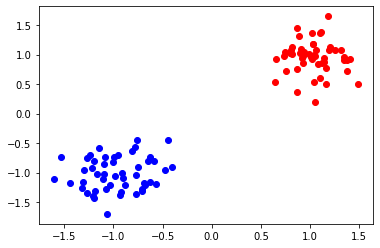

In [2]:
np.random.seed(123)
def get_data():
  x1 = np.random.normal(-1, .25, size=[50, 2])
  x2 = np.random.normal(+1, .25, size=[50, 2])


  X = np.concatenate((x1, x2), axis=0)
  y = np.concatenate((np.ones(50), np.zeros(50)))

  # X = np.concatenate((X, np.ones(100).reshape(-1, 1)), axis=1) # adicionar o "bias"
  return X, y

X, y = get_data()
plt.plot( X[y==1, 0], X[y==1, 1], 'bo' )
plt.plot( X[y==0, 0], X[y==0, 1], 'ro' )

# Visualização

Aqui criamos uma função que mostra a base de dados e a superficie de decisão criada, i.e., ela mostra qual é a reta que separa as amostras, bem como qual região corresponde a qual classe.

In [3]:
def plot_SLP(x, y, w):
  a = -w[0]/w[1]
  b = 0
  if w.size == 3:
    b = -w[2]/w[1]

  ax = plt.subplot(1,1,1)

  ax.plot( x[y==1, 0], x[y==1, 1], 'bo' )
  ax.plot( x[y==0, 0], x[y==0, 1], 'ro' )

  x0 = np.linspace(x[:,0].min(), x[:,0].max(), 1000)
  x1 = np.linspace(x[:,1].min(), x[:,1].max(), 1000)
  y_hat = np.empty([1000, 1000])
  for i, xj in enumerate(x1):
    for j, xi in enumerate(x0):
      if w.size == 2:
        y_hat[i, j] = 1 if np.array([xi, xj]).dot(w) > 0 else 0
      else:
        y_hat[i, j] = 1 if np.array([xi, xj, 1]).dot(w) > 0 else 0

  ax.contourf(x0, x1, y_hat, cmap='RdBu')

# Treinamento

Na cálula abaixo efetuamos o treinamento do **SLP**. Se possível, gostaria que você tentasse implementar a célula abaixo usando principalmente a aula como referência. Consulte o código propriamente dito apenas se estiver com dificuldade.

**Obs.:** é bem provável que haja dificuldade e você tenha que consultar o código. Mesmo assim ainda acho válido tentar fazer somente a partir da aula. :)

In [4]:
def treina(X, y):
  if X.shape[1] == 2: 
    w = np.random.randn(2)
  else:
    w = np.random.randn(3)
  alpha = 0.01
  max_iter = 1000
  for i in np.arange(max_iter):
    atualizou = False
    for xi, yi in zip(X, y):    
      y_hat = 1 if xi.dot(w) > 0 else 0

      e = yi - y_hat
      w = w + alpha*e*xi
      if e != 0:
        atualizou = True
    if not atualizou:
      print('concluído na iteração ', i)
      break
  return w

# Mostrando o resultado

concluído na iteração  16
[ 0.15079965 -0.85150779]


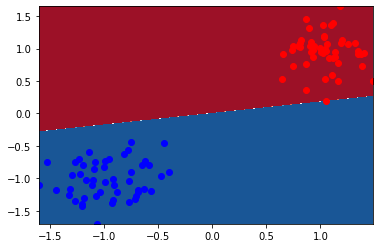

In [6]:
w = treina(X, y)

print(w)
plot_SLP(X, y, w)